# Titanic Survival Prediction
The sinking of the Titanic is one of the most infamous shipwrecks in history.
<br>On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
<br>While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
<br>In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?”
<br>Dataset from Kaggle: [Titanic](https://www.kaggle.com/c/titanic) 

# Exploratory Data Analysis

## Data Exploration

In [232]:
import pandas as pd

In [233]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [234]:
# Check dataframe dimension
df_train.shape

(891, 12)

In [235]:
# Checking for statistical describe of dataframe
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [196]:
df_train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sage, Miss. Constance Gladys",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [197]:
# Checking for datatype
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Analysis Based on Data Description
- Survived, Pclass, Sex, Embarked are categorical features.
- Age, Fare, SibSp, Parch are numerical features.
- PassengerId, Name, Ticket, Cabin are features with unique data. Because the data is unique, these features will be ignored for later analysis.

## How Many Survived?

In [198]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [199]:
# Survived by Sex
df_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

In [200]:
# Survived by Pclass
df_train.groupby(['Survived','Pclass'])['Survived'].count()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

In [201]:
# Survived by Pclass & Sex
df_train.groupby(['Survived','Pclass','Sex'])['Survived'].count()

Survived  Pclass  Sex   
0         1       female      3
                  male       77
          2       female      6
                  male       91
          3       female     72
                  male      300
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
Name: Survived, dtype: int64

In [202]:
# Survived by Embarked
df_train.groupby(['Survived','Embarked'])['Survived'].count()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Survived, dtype: int64

Based on the above analysis, Passengers with female sex, Pclass 1 and with the port of embarkation in Southampton have the highest amount of survived.

## Visualize the Data

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

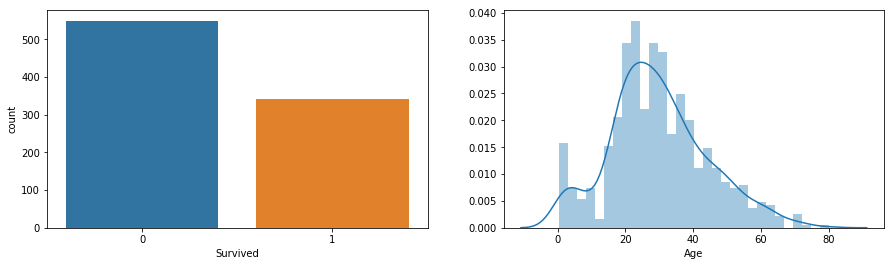

In [204]:
fig, ax = plt.subplots(1, 2, figsize = (15,4))
sns.countplot(x='Survived', data=df_train, ax=ax[0]);
sns.distplot(df_train['Age'].dropna(), bins=30, ax=ax[1]);

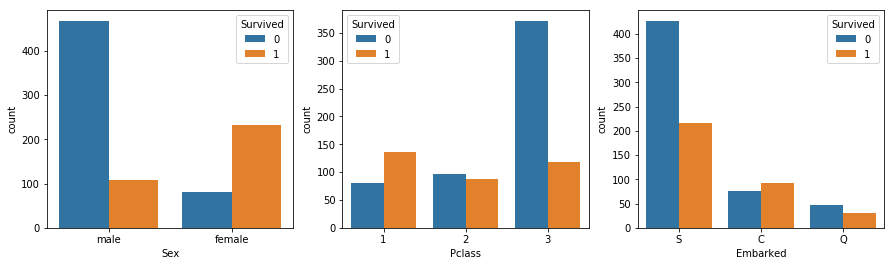

In [205]:
fig, ax = plt.subplots(1, 3, figsize = (15,4))
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[0]);
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1]);
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[2]);

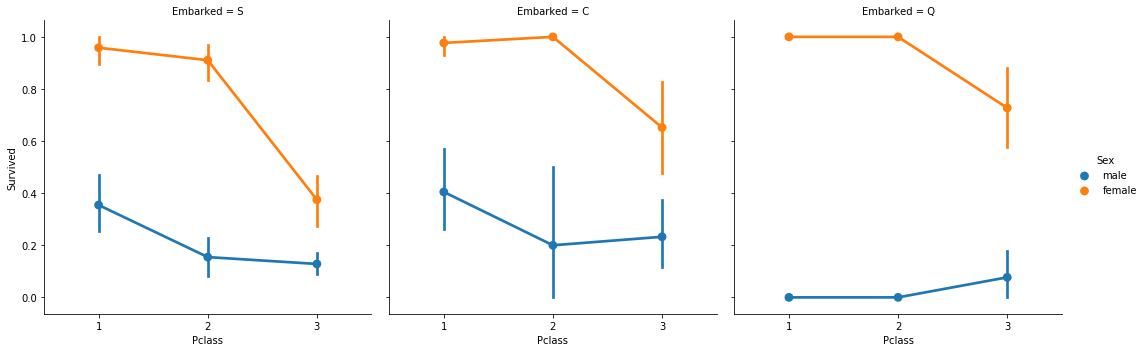

In [206]:
sns.catplot('Pclass','Survived', col='Embarked', hue= 'Sex', kind='point', data=df_train);

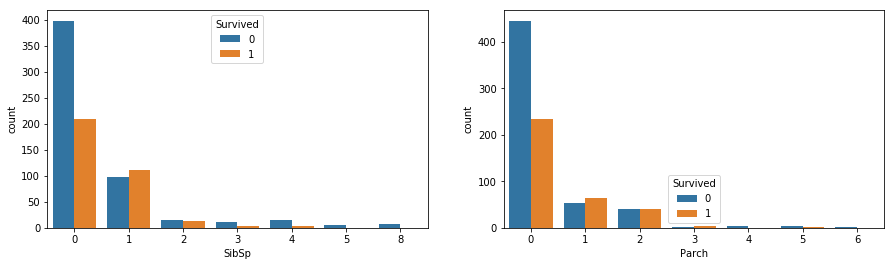

In [207]:
fig, ax = plt.subplots(1, 2, figsize = (15,4))
sns.countplot(x='SibSp', hue='Survived', data=df_train, ax=ax[0]);
sns.countplot(x='Parch', hue='Survived', data=df_train, ax=ax[1]);

## Correlation Between the Features

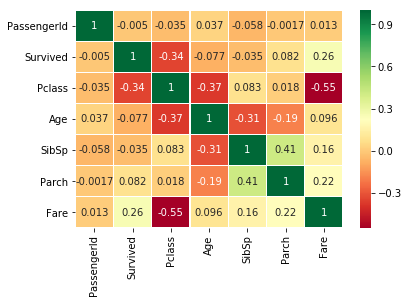

In [208]:
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn',linewidths=0.2)
plt.show()

Based on the heatmap above, we can see that the features are not much correlated. The highest correlation is between SibSp and Parch = 0.41. So all features can be used for further analysis.

## Data Cleaning

In [209]:
# Checking for missing values
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Based on the amount of missing data above:
- Age feature there are a lot of missing values. Next will be filled with the median value from the Age data.
- Cabin feature there are very many missing values. (Feature ignored)
- Embarked feature there are 2 missing values. Next will be filled with the mode value from Embarked data.

In [230]:
# Filling Missing Value
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

In [211]:
# Delete Column
df_train.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace = True)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# Modelling
Using one classification model, Logistic Regression Model. This modeling was carried out two experiments: 1) Without Data Preprocessing, and 2) With Data Preprocessing. The ultimate goal is to compare the two experiments based on the scores on the evaluation.

In [212]:
data_train = df_train.copy();

## 1. Without Data Preprocessing

In [213]:
from sklearn.model_selection import train_test_split

X_all1 = data_train._get_numeric_data().drop(['Survived'], axis=1)
y_all1 = data_train['Survived']

# Setting Test Data = 20% of Train Data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_all1, y_all1, test_size=0.2, random_state=0)

In [214]:
# Showing for Test Data
pd.concat([y_test1, X_test1], axis=1).head()

,Survived,Pclass,Age,SibSp,Parch,Fare
495,0,3,28.0,0,0,14.4583
648,0,3,28.0,0,0,7.5500
278,0,3,7.0,4,1,29.1250
31,1,1,28.0,1,0,146.5208
255,1,3,29.0,0,2,15.2458


In [215]:
from sklearn.linear_model import LogisticRegression

logres = LogisticRegression(solver='lbfgs')
logres.fit(X_train1, y_train1)

y_train_pred1 = logres.predict(X_train1)

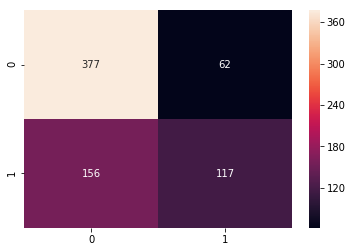

In [216]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_train1, y_train_pred1), annot = True, fmt='.0f');

### Evaluation
Evaluation of Classification is done by getting the Precision, Recall and F1 Score based on the Confusion Matrix values above.

In [217]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [218]:
# 1. Without Data Preprocessing
print(precision_score(y_train1, y_train_pred1))
print(recall_score(y_train1, y_train_pred1))
print(f1_score(y_train1, y_train_pred1))

0.6536312849162011
0.42857142857142855
0.5176991150442477


## 2. With Data Preprocessing
Data preprocessing to change numerical data using Feature Scaling and categorical data using Label Encoding.

In [219]:
from sklearn import preprocessing

In [220]:
# Label Encoding
def encode_features(data_train):
    features = ['Sex', 'Pclass', 'Embarked']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(data_train[feature])
        data_train[feature] = le.transform(data_train[feature])
    return data_train
    
data_train = encode_features(data_train)

In [221]:
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,2,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,2,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [222]:
X_all2 = data_train.drop(['Survived','Name'], axis=1)
y_all2 = data_train['Survived']

# Setting Test Data = 20% of Train Data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_all2, y_all2, test_size=0.2, random_state=0)

In [223]:
X_test2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,2,1,28.0,0,0,14.4583,0
648,2,1,28.0,0,0,7.5500,2
278,2,1,7.0,4,1,29.1250,1
31,0,0,28.0,1,0,146.5208,0
255,2,0,29.0,0,2,15.2458,0


In [224]:
# Feature Scaling
scaler = preprocessing.StandardScaler().fit(X_train2)

X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

C:\Users\ICHAL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ICHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\ICHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


In [225]:
logres = LogisticRegression(solver='lbfgs')
logres.fit(X_train2, y_train2)

y_train_pred2 = logres.predict(X_train2)

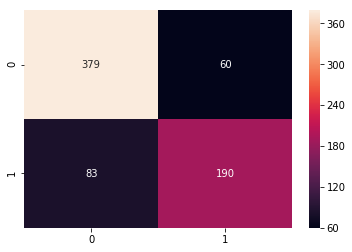

In [226]:
sns.heatmap(confusion_matrix(y_train2, y_train_pred2), annot = True, fmt='.0f');

### Evaluation

In [227]:
# 2. With Data Preprocessing
print(precision_score(y_train2, y_train_pred2))
print(recall_score(y_train2, y_train_pred2))
print(f1_score(y_train2, y_train_pred2))

0.76
0.6959706959706959
0.7265774378585086


# Conclution
Based on the model score on the evaluation of both experiments. The score with the highest value is after doing Data Preprocessing.

## Predict Test Data

In [228]:
y_test_pred2 = logres.predict(X_test2)

In [229]:
# Showing for Prediction of Test Data
pd.DataFrame({'Survived' : y_test_pred2}).head()

,Survived
0,0
1,0
2,0
3,1
4,1


# Credit: Challenge
This is a challenge for me as a student of **Kelas Pintaar: Pengenalan Data Science dengan Menggunakan Python - Dengan Studi Kasus)**.
<br>
<br> Date of Creation:
<br> Work 1: 16 November 2019
<br> Work 2: 30 Januari 2020
<br> Work 3: Februari 2020